---

## Landmine Classification

Buried mines and unexploded ordinance (UXO) pose a major threat to operatives, civilians, and wildlife. Typically, active detectors are used to identify these hazards and remove them before they can cause harm, by emitting signals and receiving back characteristics of the buried mine. However, in some cases these active detectors can end up triggering the mine early, causing damage.

Passive detectors are underexplored alternatives that do not rely on emissions of signals to detect buried objects. For example, our detector works by passively reading the magnetic field above the buried object. However, passive sensor readings are much more sensitive than active sensors, and thus can be very difficult to calibrate.

In this notebook, you will develop models to detect the presence of different types of buried landmines, based of readings from a custom passive sensor.

The dataset used in this exercise comes from Yilmaz, C., Kahraman, H. T., & Söyler, S. (2018). [Passive mine detection and classification method based on hybrid model.](https://www.semanticscholar.org/paper/Passive-Mine-Detection-and-Classification-Method-on-Yilmaz-Kahraman/c70a13956cfeb634a235bc9a5b3398f2000fe68c) IEEE Access, 6, 47870-47888.



In [ ]:
# Here, we include common libraries used for data processing and machine learning.
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
!wget https://github.com/SOCOM-Ignite/ML_AI_Kickoff/releases/download/v1.0.0/LandmineData.csv

In [ ]:
data = pd.read_csv("LandmineData.csv")

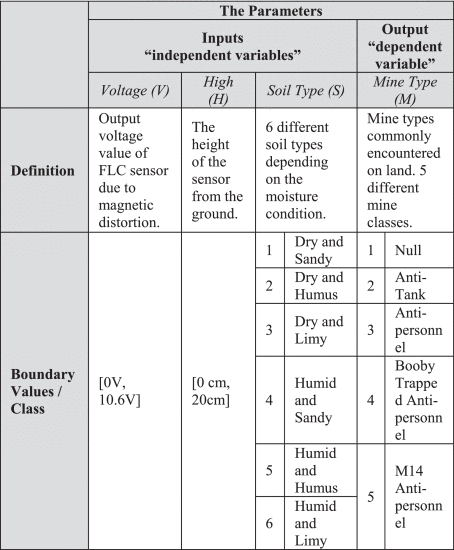

Information about the dataset is shown above.

One of the first steps we need to take with our data is to standardize it, so that all independent variables lie in a similar range. For this notebook, we will force our data to lie in the range [0,1].

Question 1: Why might it be important to standardize all dependent variables to lie in similar value ranges?

** Write your answer here **



In [ ]:
data['V'] = data['V'] / 10.6

Question 2: Write code to standardize the height variable.

In [ ]:
# YOUR CODE HERE


In [ ]:
# If this cell fails to run, your code was incorrect.
assert (data['H'] >= 0.0).all() and (data['H'] <= 1.0).all()

Next, we do additional preprocessing for categorical independent variables. We'll encode the 'S' variable into humidity and soil texture. Notice how instead of leaving soil texture as a number [0, 1, 2], we instead encode it as a set of True/False variables. This technique is called "one-hot encoding".

Question 3: Why would it be better to encode a categorical variable like soil texture as a set of True/False variables rather than an ordinal number?

** Write your answer here **

Finally, we will separate our data into our independent variables (voltage, height, soil) and our dependent variable (mine type). Our independent variables will be X, and our dependent variable will be y.

In [ ]:
data['Humid'] = data['S'].isin([4, 5, 6])
data = data.join(pd.get_dummies(data['S'] % 3).rename(columns={0: "Sandy", 1: "Humus", 2: "Limy"}))
data = data.drop(columns='S')

y = data['M']
X = data.drop(columns='M')
X

In [ ]:
y

The next step for setting up our supervised learning task is to split our data into training, validation, and test sets. We will use the convenient `train_test_split` function from Scikit-Learn for this.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [ ]:
X_train

In [ ]:
print("X_test size:", len(X_test))

Question 4: From your observations, what did the `train_test_split` function do to the X data frame?

** Write your answer here **

Question 5: Write code to split `X_train` and `y_train` again, into `X_train`, `X_validation`, `y_train`, and `y_validation`. Try to keep the validation sets a similar size to the test sets.

In [ ]:
# YOUR CODE HERE


In [ ]:
assert X_train is not None
assert X_validation is not None
assert y_train is not None
assert y_validation is not None
print("X_validation size:", len(X_validation))
print("y_validation size:", len(y_validation))

Let us do some basic exploration of our training data. First, we will plot the distribution of voltages and heights in our training data.

In [ ]:
X_train['V'].plot(kind='hist')

In [ ]:
X_train['H'].plot(kind='hist')

Question 6: Which variable is more evenly distributed? Voltage or Height?

** Write your answer here **

In [ ]:
y_train.value_counts() # This prints the number of appearances of each mine type.

Question 7: If we selected a random sample from our dataset, what is the probability of it being an anti-tank mine? Refer to the dataset info picture at the top of the notebook.

** Write your answer here **

Finally, we are ready to train a model. First, we will start with one of the simplest models, k-Nearest Neighbors. The Scikit-Learn interface is very simple. You train models with the `fit()` method, and get predictions with the `predict()` method.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)


print("Training set accuracy:", model.score(X_train, y_train))
print("Validation set accuracy:", model.score(X_validation, y_validation))


Question 8: Try varying the `n_neighbors` hyperparameter of the kNN classifier above, and rerun the cell. What training accuracy do you get for 1, 2, 5, 10, 20 neighbors? What validation accuracy do you get?

** Write your answer here **



Now, we will try a different model, a decision tree classifier.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10)

model.fit(X_train, y_train)


print("Training set accuracy:", model.score(X_train, y_train))
print("Validation set accuracy:", model.score(X_validation, y_validation))

Question 9: Try varying the `max_depth` hyperparameter of the Decision Tree classifier above, and rerun the cell. How did the gap between the validation accuracy and training accuracy change as you increased or decreased the hyperparameter?

\*\* Write your answer here \*\*



Question 10: Choose a classifier from [https://scikit\-learn.org/stable/auto\_examples/classification/plot\_classifier\_comparison.html](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and implement its training and scoring in the cell below. Refer to the documentation [https://scikit\-learn.org/stable/modules/classes.html](https://scikit-learn.org/stable/modules/classes.html) to see the hyperparameters for each classifier. Try and reach the highest validation accuracy you can by changing classifiers and hyperparameters.


In [ ]:
## YOUR CODE HERE

Finally, we will use the test set to simulate our model's performance in the real world.


In [ ]:
print("Test set accuracy:", model.score(X_test, y_test))